In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# dataset
df = pd.read_csv("final_cleaned.csv")

# clip : avoid log/scale issues
for col in ['cash_per_capita', 'leave_per_capita', 'services_per_capita']:
    df[col] = df[col].clip(lower=1)

# add features
features = [
    'weekly_hours',
    'cash_per_capita',
    'leave_per_capita',
    'services_per_capita'
]

# standardize 
X_raw = df[features]
X_means = X_raw.mean()
X_stds = X_raw.std()
X_standardized = (X_raw - X_means) / X_stds

# adds intercept
X = np.c_[np.ones(X_standardized.shape[0]), X_standardized.values]
Y = df['birth_rate_per_thousand'].values

# train model
beta = np.linalg.inv(X.T @ X) @ (X.T @ Y)
df['predicted_birth_rate'] = X @ beta

# eval
mae = np.mean(np.abs(Y - df['predicted_birth_rate']))
ss_total = np.sum((Y - np.mean(Y))**2)
ss_resid = np.sum((Y - df['predicted_birth_rate'])**2)
r_squared = 1 - (ss_resid / ss_total)

print("Evaluation of Model:")
print(f"MAE: {mae:.3f}")
print(f"R²:  {r_squared:.3f}\n")

# print coefficients
feature_names = ['intercept'] + features
for name, b in zip(feature_names, beta):
    print(f"{name:<20} {b:.4f}")

# sample
countryX = pd.DataFrame([{
    "weekly_hours": 34,
    "cash_per_capita": 1200,
    "leave_per_capita": 600,
    "services_per_capita": 1000
}])

# standardize using training set
countryX_std = (countryX - X_means) / X_stds
X_new = np.c_[np.ones(countryX_std.shape[0]), countryX_std.values]
countryX['predicted_birth_rate'] = X_new @ beta

print("\nPredicted birth rate for Country X’s input:", countryX['predicted_birth_rate'].values[0])


Evaluation of Model:
MAE: 1.029
R²:  0.113

intercept            9.6115
weekly_hours         -0.0264
cash_per_capita      0.5595
leave_per_capita     -0.1669
services_per_capita  -0.0849

Predicted birth rate for Country X’s input: 12.680992104720309


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

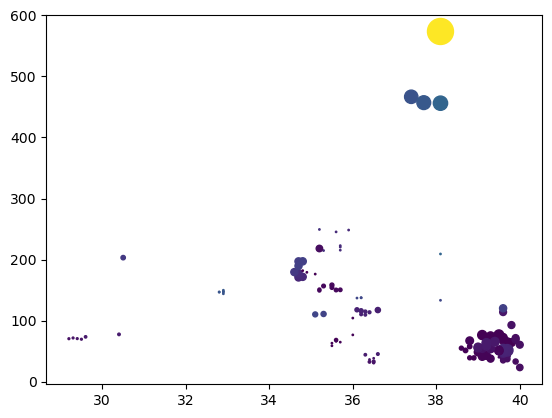

In [57]:
plt.scatter(df['weekly_hours'], df['cash_per_capita'], df['leave_per_capita'], df['services_per_capita'])
plt.legend

Text(0, 0.5, 'pred')

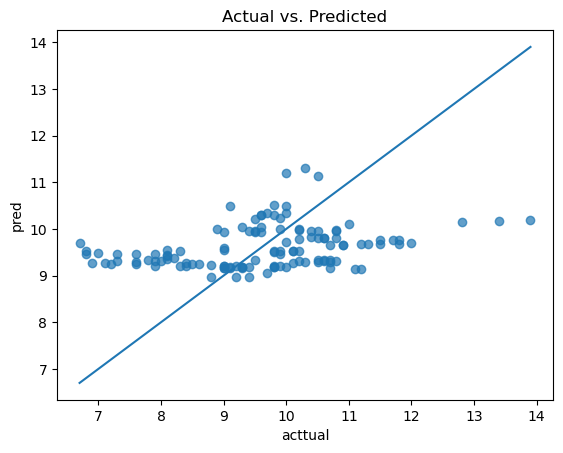

In [58]:

plt.scatter(df['birth_rate_per_thousand'], df['predicted_birth_rate'], alpha=0.7)
plt.plot([df['birth_rate_per_thousand'].min(), df['birth_rate_per_thousand'].max()],
[df['birth_rate_per_thousand'].min(), df['birth_rate_per_thousand'].max()],label='Perfect Pred')
plt.title('Actual vs. Predicted')
plt.xlabel('acttual')
plt.ylabel('pred')

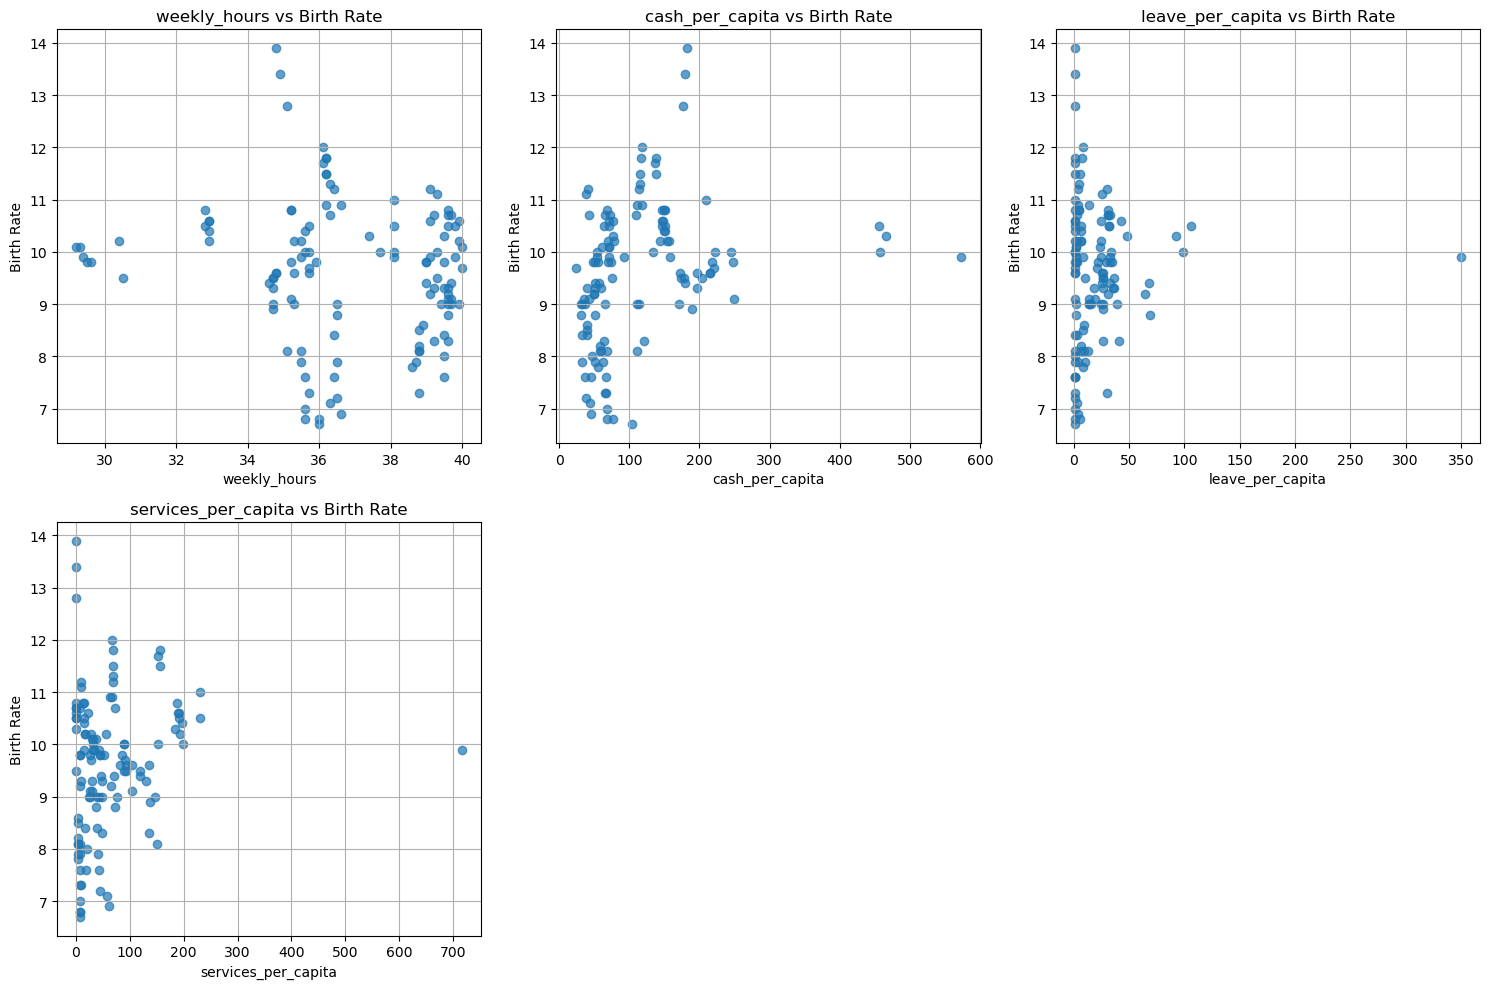

In [59]:

features = [
    'weekly_hours',
    'cash_per_capita',
    'leave_per_capita',
    'services_per_capita'
    
]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    plt.scatter(df[feature], df['birth_rate_per_thousand'], alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel("Birth Rate")
    plt.title(f'{feature} vs Birth Rate')
    plt.grid(True)

plt.tight_layout()
plt.show()
